In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

In [2]:
# Load datasets
df_train = pd.read_csv('https://raw.githubusercontent.com/snehuuu28/Excelr_Data_Science/main/Assignments/Assignment_15/Titanic_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/snehuuu28/Excelr_Data_Science/main/Assignments/Assignment_15/Titanic_test.csv')

In [3]:
# Combine train and test datasets for uniform preprocessing
df = pd.concat([df_train, df_test], axis=0)  # axis=0 means stacking rows
print("Combined Dataset Shape:", df.shape)

Combined Dataset Shape: (1309, 12)


In [4]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [5]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


# Exploratory Data Analysis

In [7]:
# Descriptive statistics
print("Dataset Summary Statistics:\n", df.describe())

Dataset Summary Statistics:
        PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.020061    0.486592     0.837836    14.413493     1.041658   
min       1.000000    0.000000     1.000000     0.170000     0.000000   
25%     328.000000    0.000000     2.000000    21.000000     0.000000   
50%     655.000000    0.000000     3.000000    28.000000     0.000000   
75%     982.000000    1.000000     3.000000    39.000000     1.000000   
max    1309.000000    1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1308.000000  
mean      0.385027    33.295479  
std       0.865560    51.758668  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200  


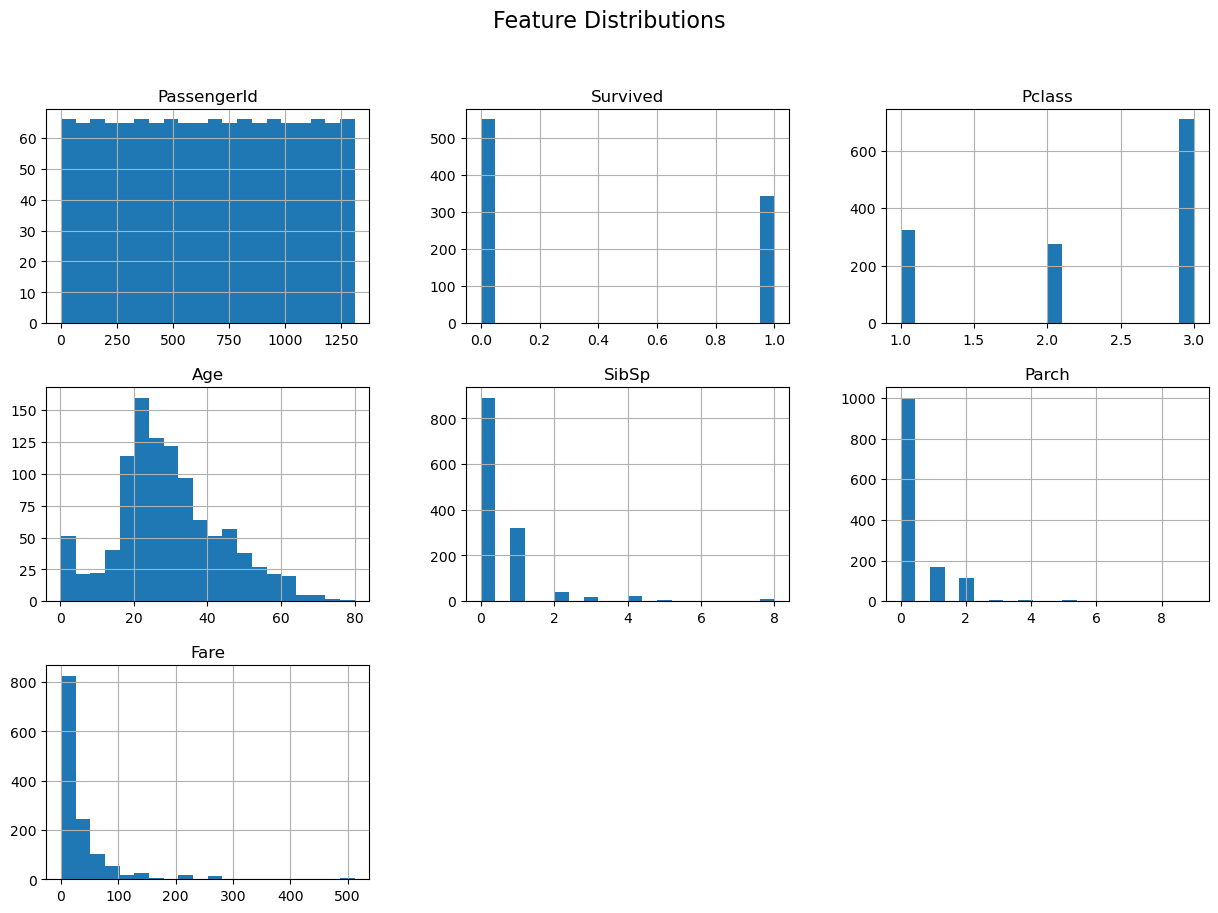

In [8]:
# Visualizing distributions using histograms
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

In [9]:
# Checking for duplicate indices and resetting if any
print("Duplicate Indices Count:", df.index.duplicated().sum())
if df.index.duplicated().any():
    df = df.reset_index(drop=True)  # Reset the index

Duplicate Indices Count: 418


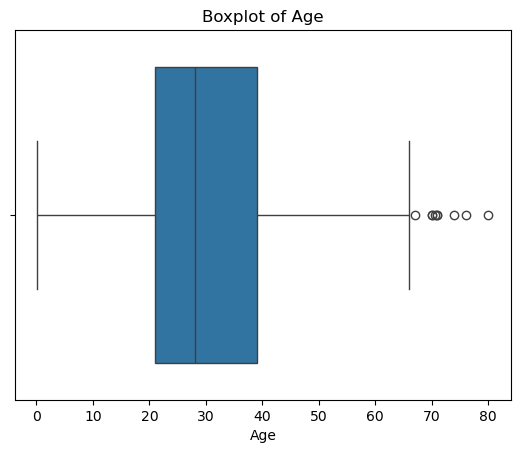

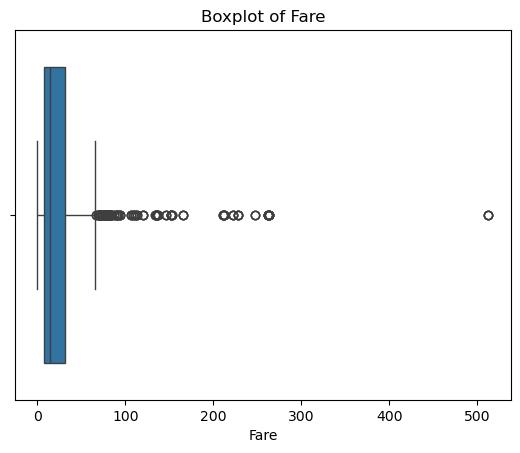

In [10]:
# Boxplots for outlier analysis
for col in ['Age', 'Fare']:
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

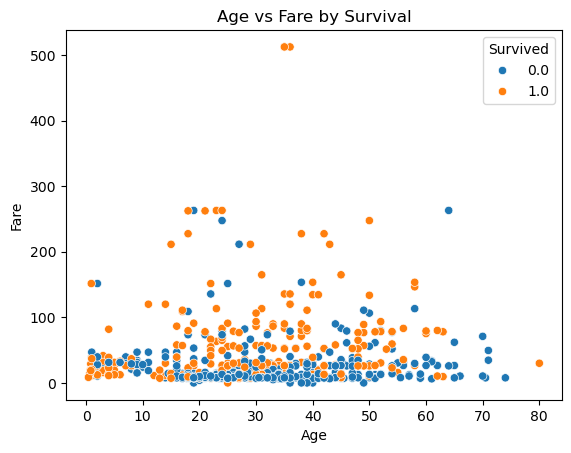

In [11]:
# Scatter plot to visualize relationships
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.title('Age vs Fare by Survival')
plt.show()

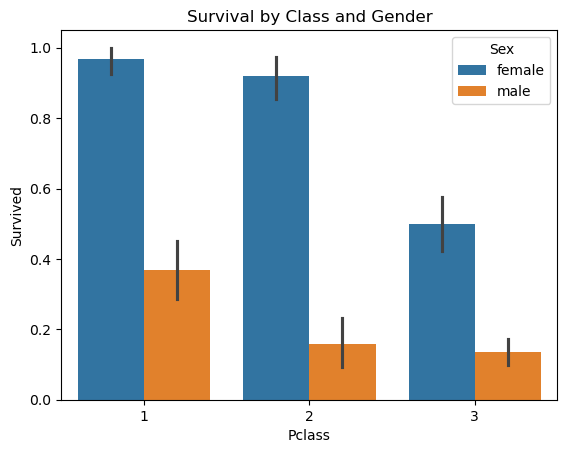

In [12]:
# Bar plot to show survival by class and gender
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex')
plt.title('Survival by Class and Gender')
plt.show()

# Data Preprocessing

In [14]:
# Impute missing values
df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing Age with median
df['Fare'].fillna(df['Fare'].median(), inplace=True)  # Fill missing Fare with median
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill missing Embarked with mode
df['Survived'].fillna(0, inplace=True)  # For the test set, fill Survived with 0 (not used in training)

In [15]:
# Verify missing values are handled
print("Missing Values After Imputation:\n", df.isnull().sum())

Missing Values After Imputation:
 PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64


In [16]:
# Drop irrelevant columns
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [17]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

In [18]:
# Label encoding for 'Sex'
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [19]:
# One-hot encoding for 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [20]:
# Split dataset into features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Building

In [23]:
# Initialize models
lgbm_model = LGBMClassifier(random_state=42)
xgbm_model = XGBClassifier(random_state=42)

In [24]:
# Train models
lgbm_model.fit(X_train, y_train)
xgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 234, number of negative: 682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 235
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.255459 -> initscore=-1.069709
[LightGBM] [Info] Start training from score -1.069709


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [25]:
# Predictions
lgbm_preds = lgbm_model.predict(X_test)
xgbm_preds = xgbm_model.predict(X_test)

In [26]:
# Evaluation
metrics = {}
for model_name, preds in zip(['LGBM', 'XGBM'], [lgbm_preds, xgbm_preds]):
    metrics[model_name] = {
        'Accuracy': accuracy_score(y_test, preds),
        'Precision': precision_score(y_test, preds),
        'Recall': recall_score(y_test, preds),
        'F1-Score': f1_score(y_test, preds),
    }

In [27]:
# Display metrics
metrics_df = pd.DataFrame(metrics).T
print("Performance Metrics:\n", metrics_df)

Performance Metrics:
       Accuracy  Precision    Recall  F1-Score
LGBM  0.748092   0.546392  0.490741  0.517073
XGBM  0.753181   0.557895  0.490741  0.522167


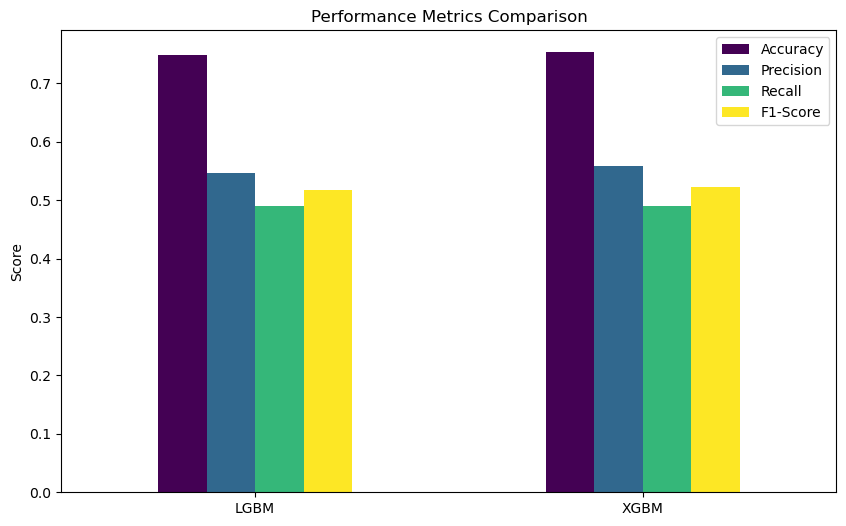

In [28]:
# Visualization of results
metrics_df.plot(kind='bar', figsize=(10, 6), title='Performance Metrics Comparison', colormap='viridis')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

# Interpretation of Results:

1) Accuracy: Accuracy indicates how well the models performed on the test data overall.


* LightGBM (LGBM): 74.81%
* XGBoost (XGBM): 75.32%
* XGBM slightly outperforms LGBM in overall accuracy, indicating a marginally better generalization on the test dataset.
  
2) Precision: Precision reveals the proportion of true positive predictions among all positive predictions.


* LightGBM: 54.64%
* XGBoost: 55.79%
* Precision is the proportion of true positives out of all predicted positives. XGBM is slightly better, meaning it has fewer false positive predictions than LGBM.

3) Recall: Recall (Sensitivity) highlights the model's ability to identify positive cases.


* LightGBM: 49.07%
* XGBoost: 49.07%
* Both models perform equally in recall, highlighting their capability to correctly identify actual positives is identical.

4) F1-Score: F1-Score balances precision and recall, and is especially useful for imbalanced datasets.


* LightGBM: 51.71%
* XGBoost: 52.22%
* The F1-Score balances precision and recall, making it particularly relevant in imbalanced datasets like Titanic's survival data. XGBM edges out slightly, indicating better handling of the trade-off.


# Insights:

- XGBM consistently outperforms LGBM in all metrics, though the differences are minor.
- The higher Precision of XGBM suggests it is better at reducing false positives, which might be advantageous in situations where predicting non-survivors incorrectly is less desirable.
- Both models show room for improvement, particularly in Recall, which is less than 50%, indicating many actual survivors are missed.
